# Import Library

In [479]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [480]:
df = pd.read_csv("Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [482]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [483]:
#Check Nilai Missing Null
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [484]:
#Describe(object)
df.describe(include=object).T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [485]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [486]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [487]:
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

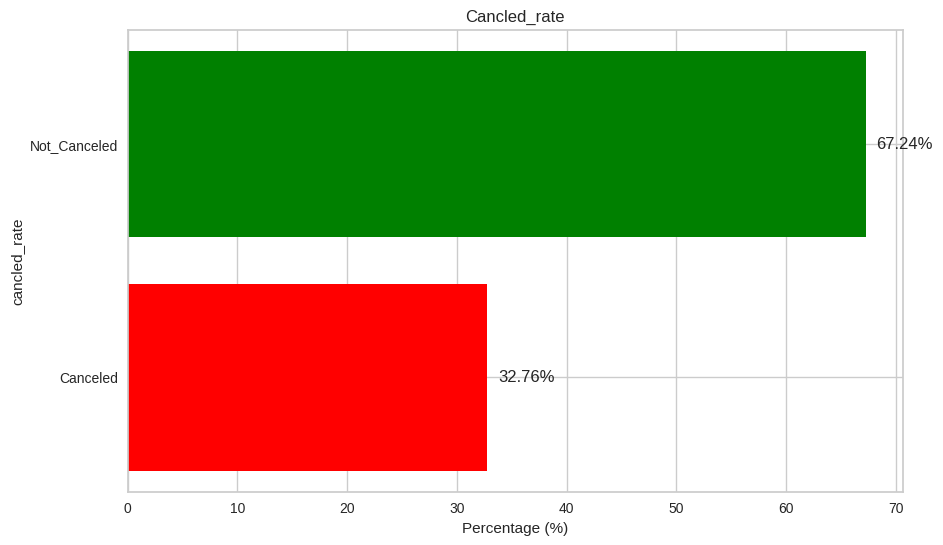

In [488]:
cancled_rate = df['booking_status'].value_counts(normalize=True) * 100

#With normalize set to True , returns the relative frequency by dividing all values by the sum of values. \
# Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values,\
# divide the index in the specified number of half-open bins.

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(cancled_rate.index, cancled_rate.values, color=['green','red'])

plt.xlabel('Percentage (%)')
plt.ylabel('cancled_rate')
plt.title('Cancled_rate')
plt.gca().invert_yaxis()  # Invert y-axis

# Add percentage labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

plt.show()

In [489]:
#Distinguishing between columns containing numerical data and those containing categorical data.
num=[]
cat=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        cat.append(col)

print('Numerical columns : ',num)
print('Categorical columns : ',cat)

Numerical columns :  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical columns :  ['Booking_ID', 'type_of_meal_plan', 'market_segment_type', 'booking_status']


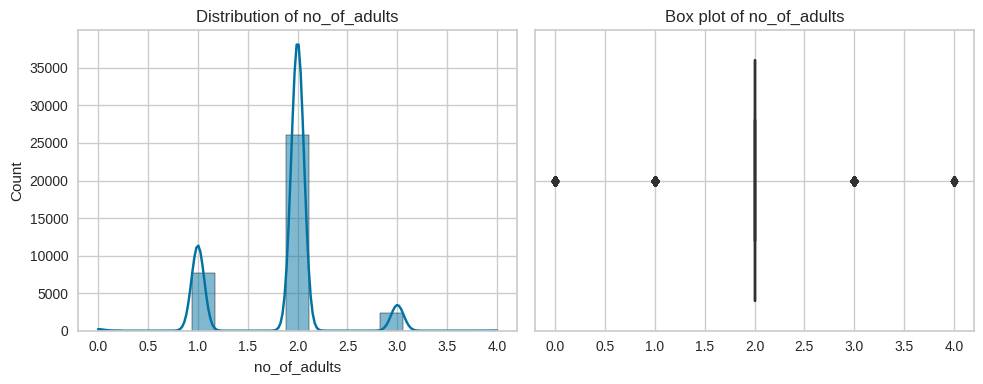

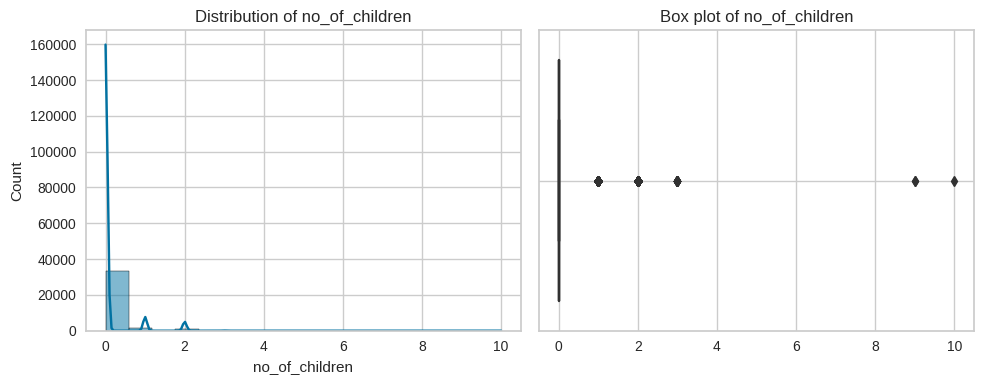

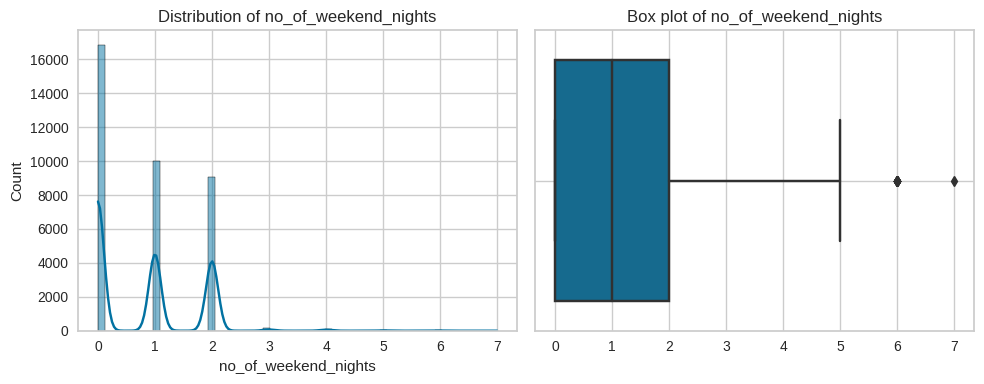

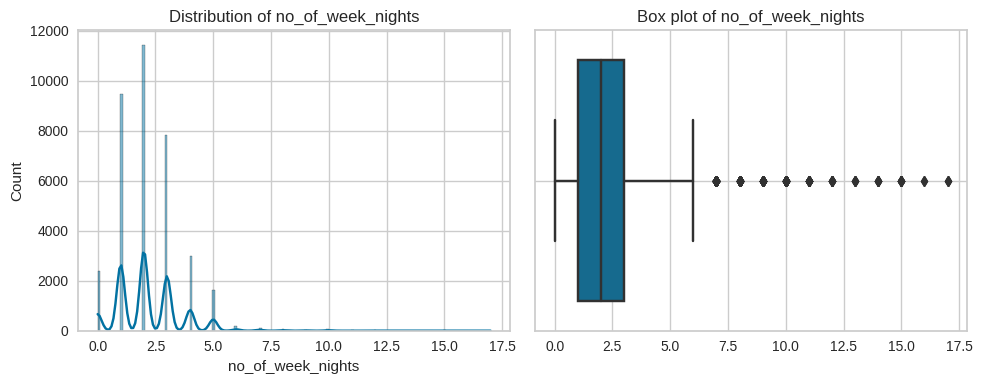

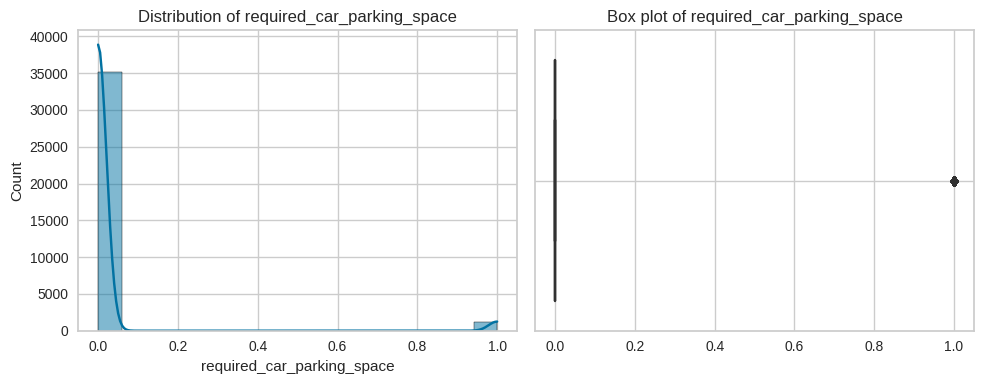

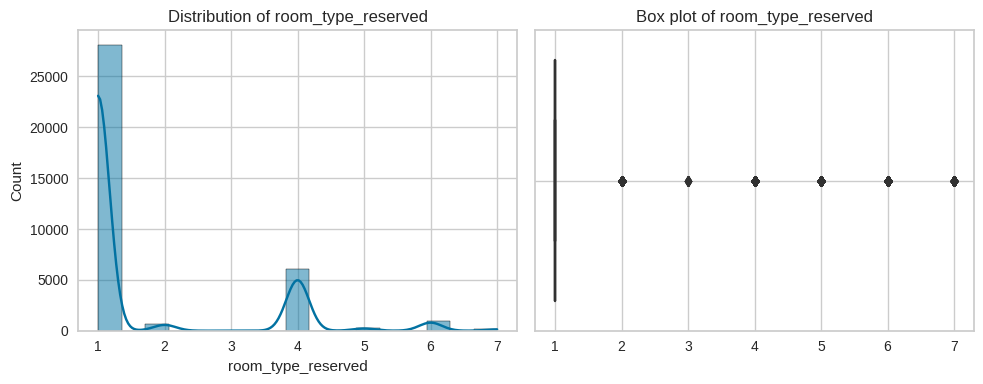

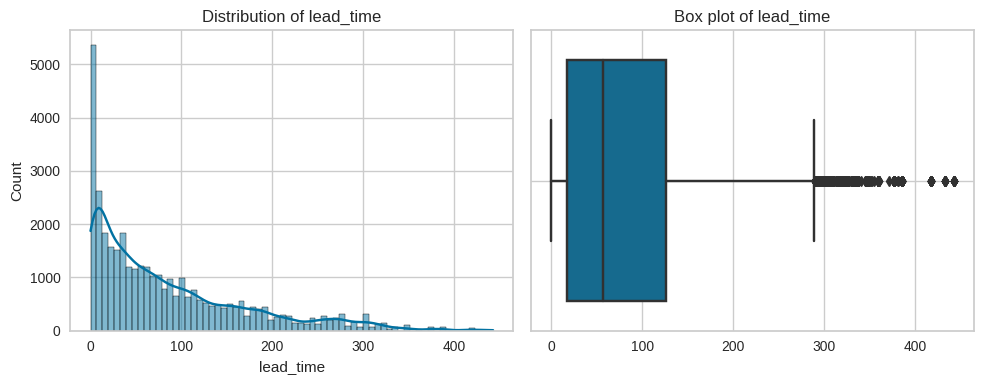

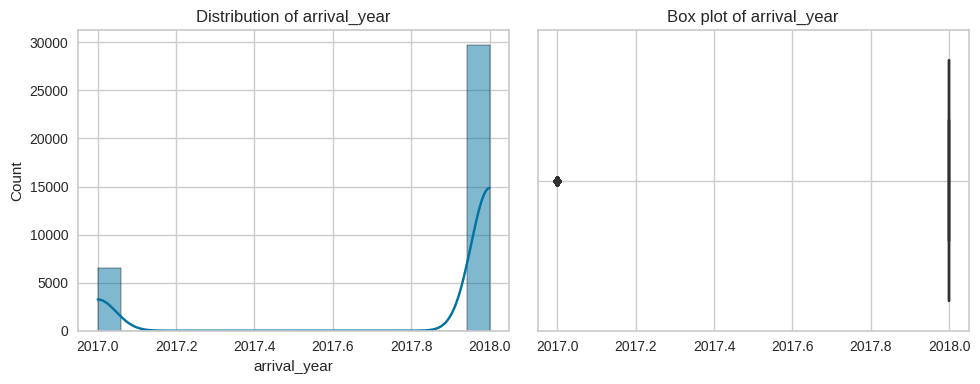

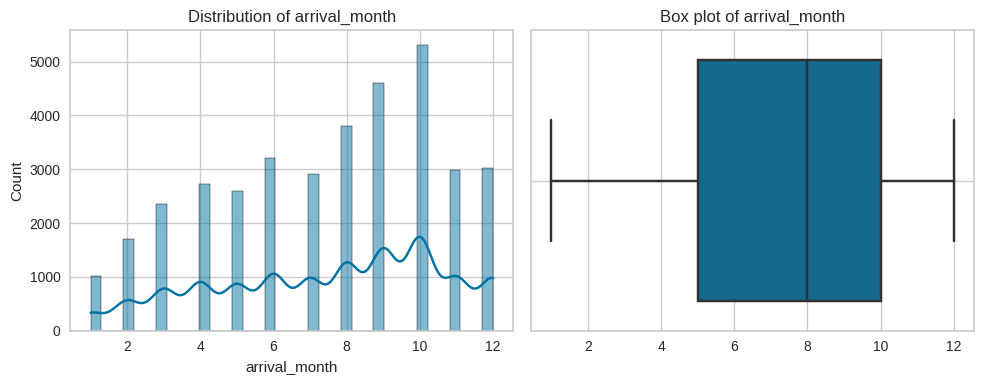

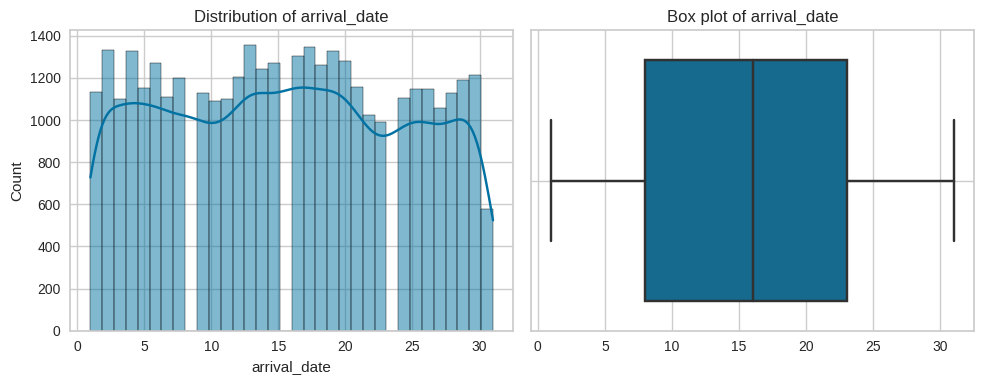

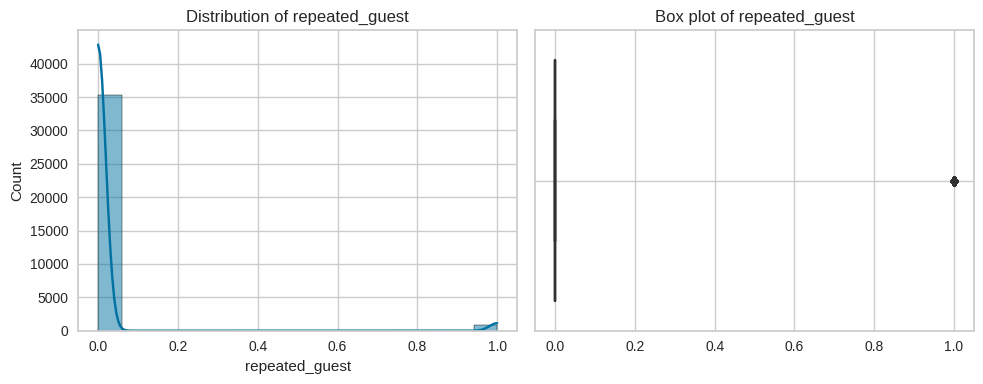

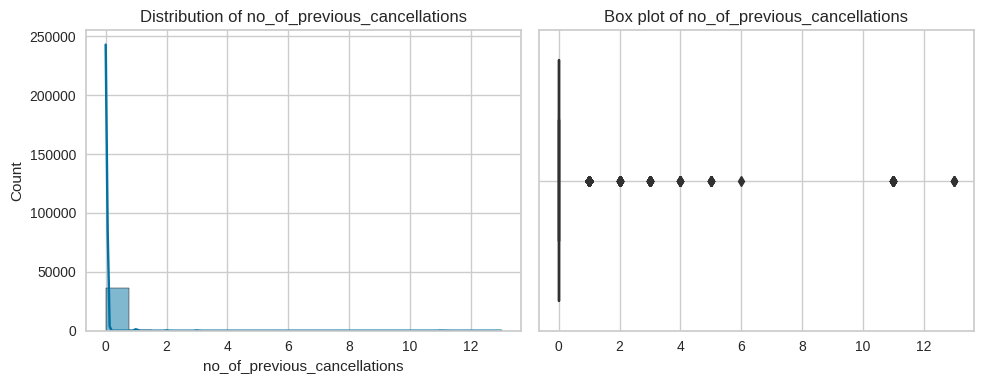

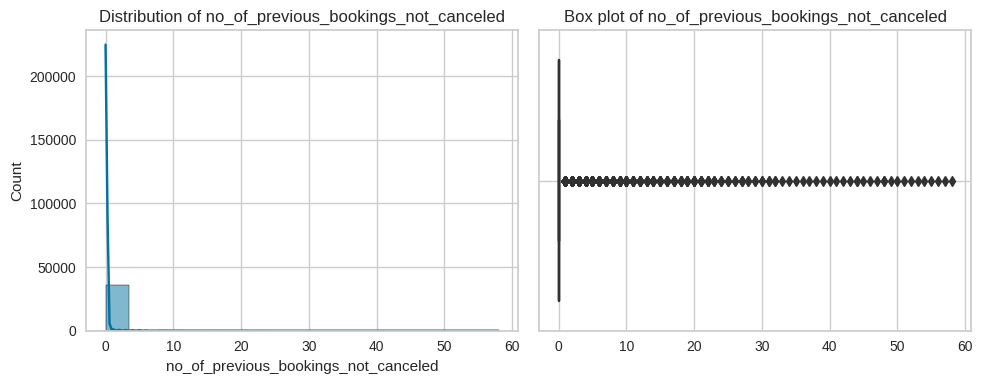

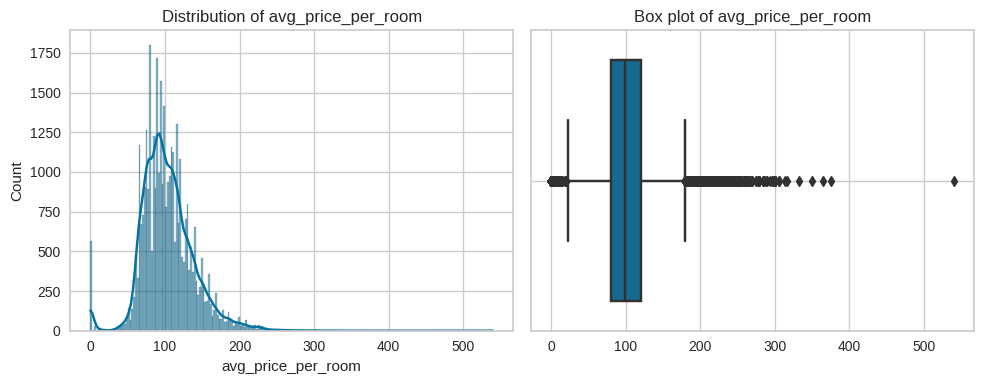

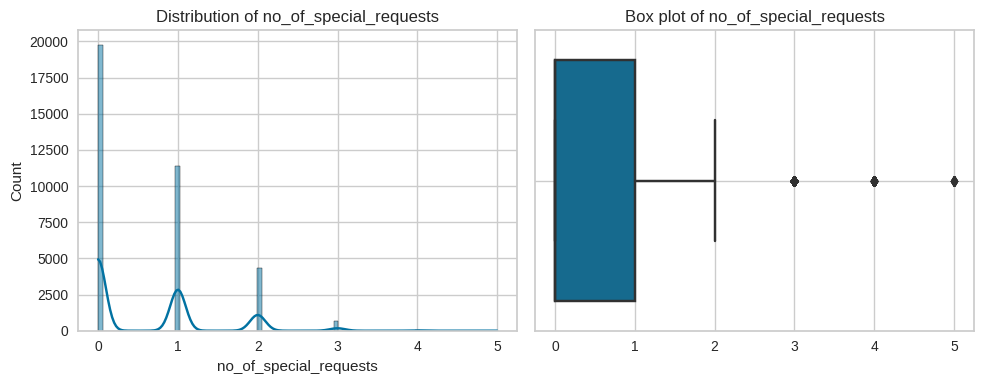

In [490]:
for i in num:
    fig,axes=plt.subplots(1,2,figsize=(10,4))

    sns.histplot(df[i],kde=True,ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')

    sns.boxplot(x=df[i],ax=axes[1])
    axes[1].set_title(f'Box plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

In [491]:
from scipy.stats import chi2_contingency

In [492]:
#The chi-square analysis is conducted to assess whether there is a relationship or association between categorical variables (data type 'object').
variables=df.columns[df.dtypes=='object'].drop(['Booking_ID','booking_status'])

results=[]
for variable in variables:
    contingency_table=pd.crosstab(df[variable],df['booking_status'])
    chi2,p_value,_,_ =chi2_contingency(contingency_table)
    results.append({'variable':variable,'chi square':chi2,'p-value':p_value})

results_df=pd.DataFrame(results)
results_df

,variable,chi square,p-value
0,type_of_meal_plan,278.294909,4.951915e-60
1,market_segment_type,814.108865,6.748763e-175


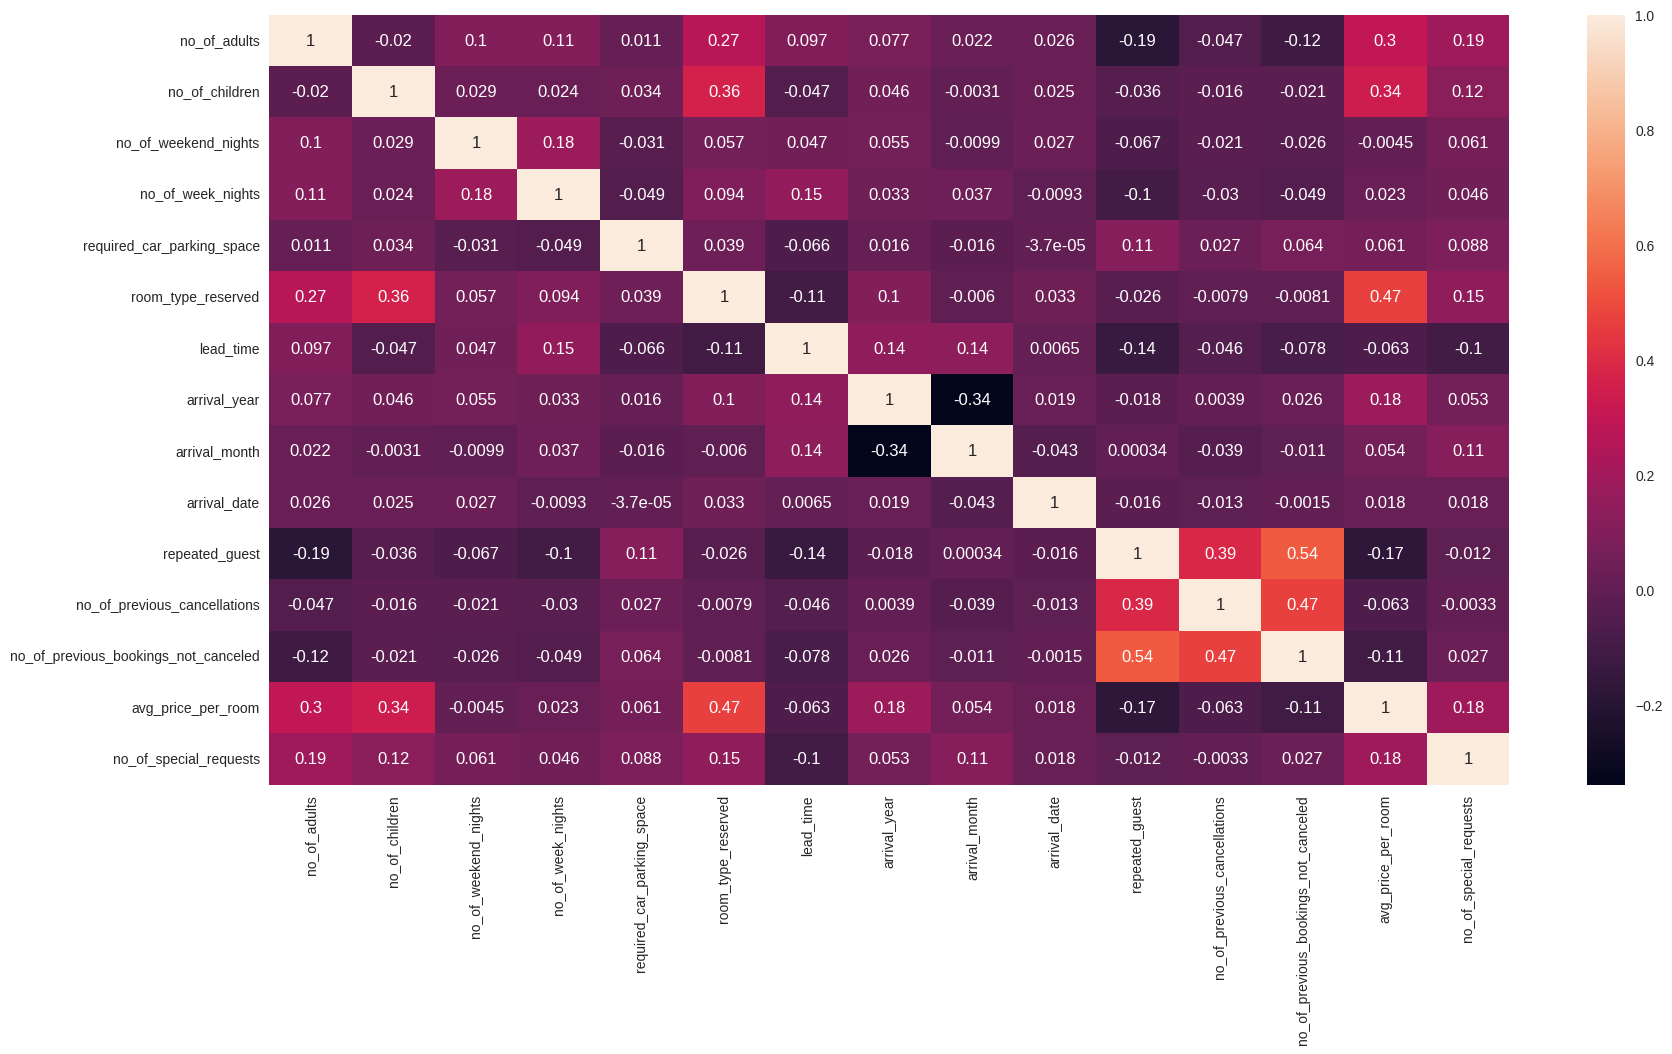

In [493]:
#plot heatmap
plt.figure(figsize=(20,10))
correlation=df.corr(numeric_only=True)
ax = sns.heatmap(correlation,annot=True)
plt.show()

# Data Visualization


<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

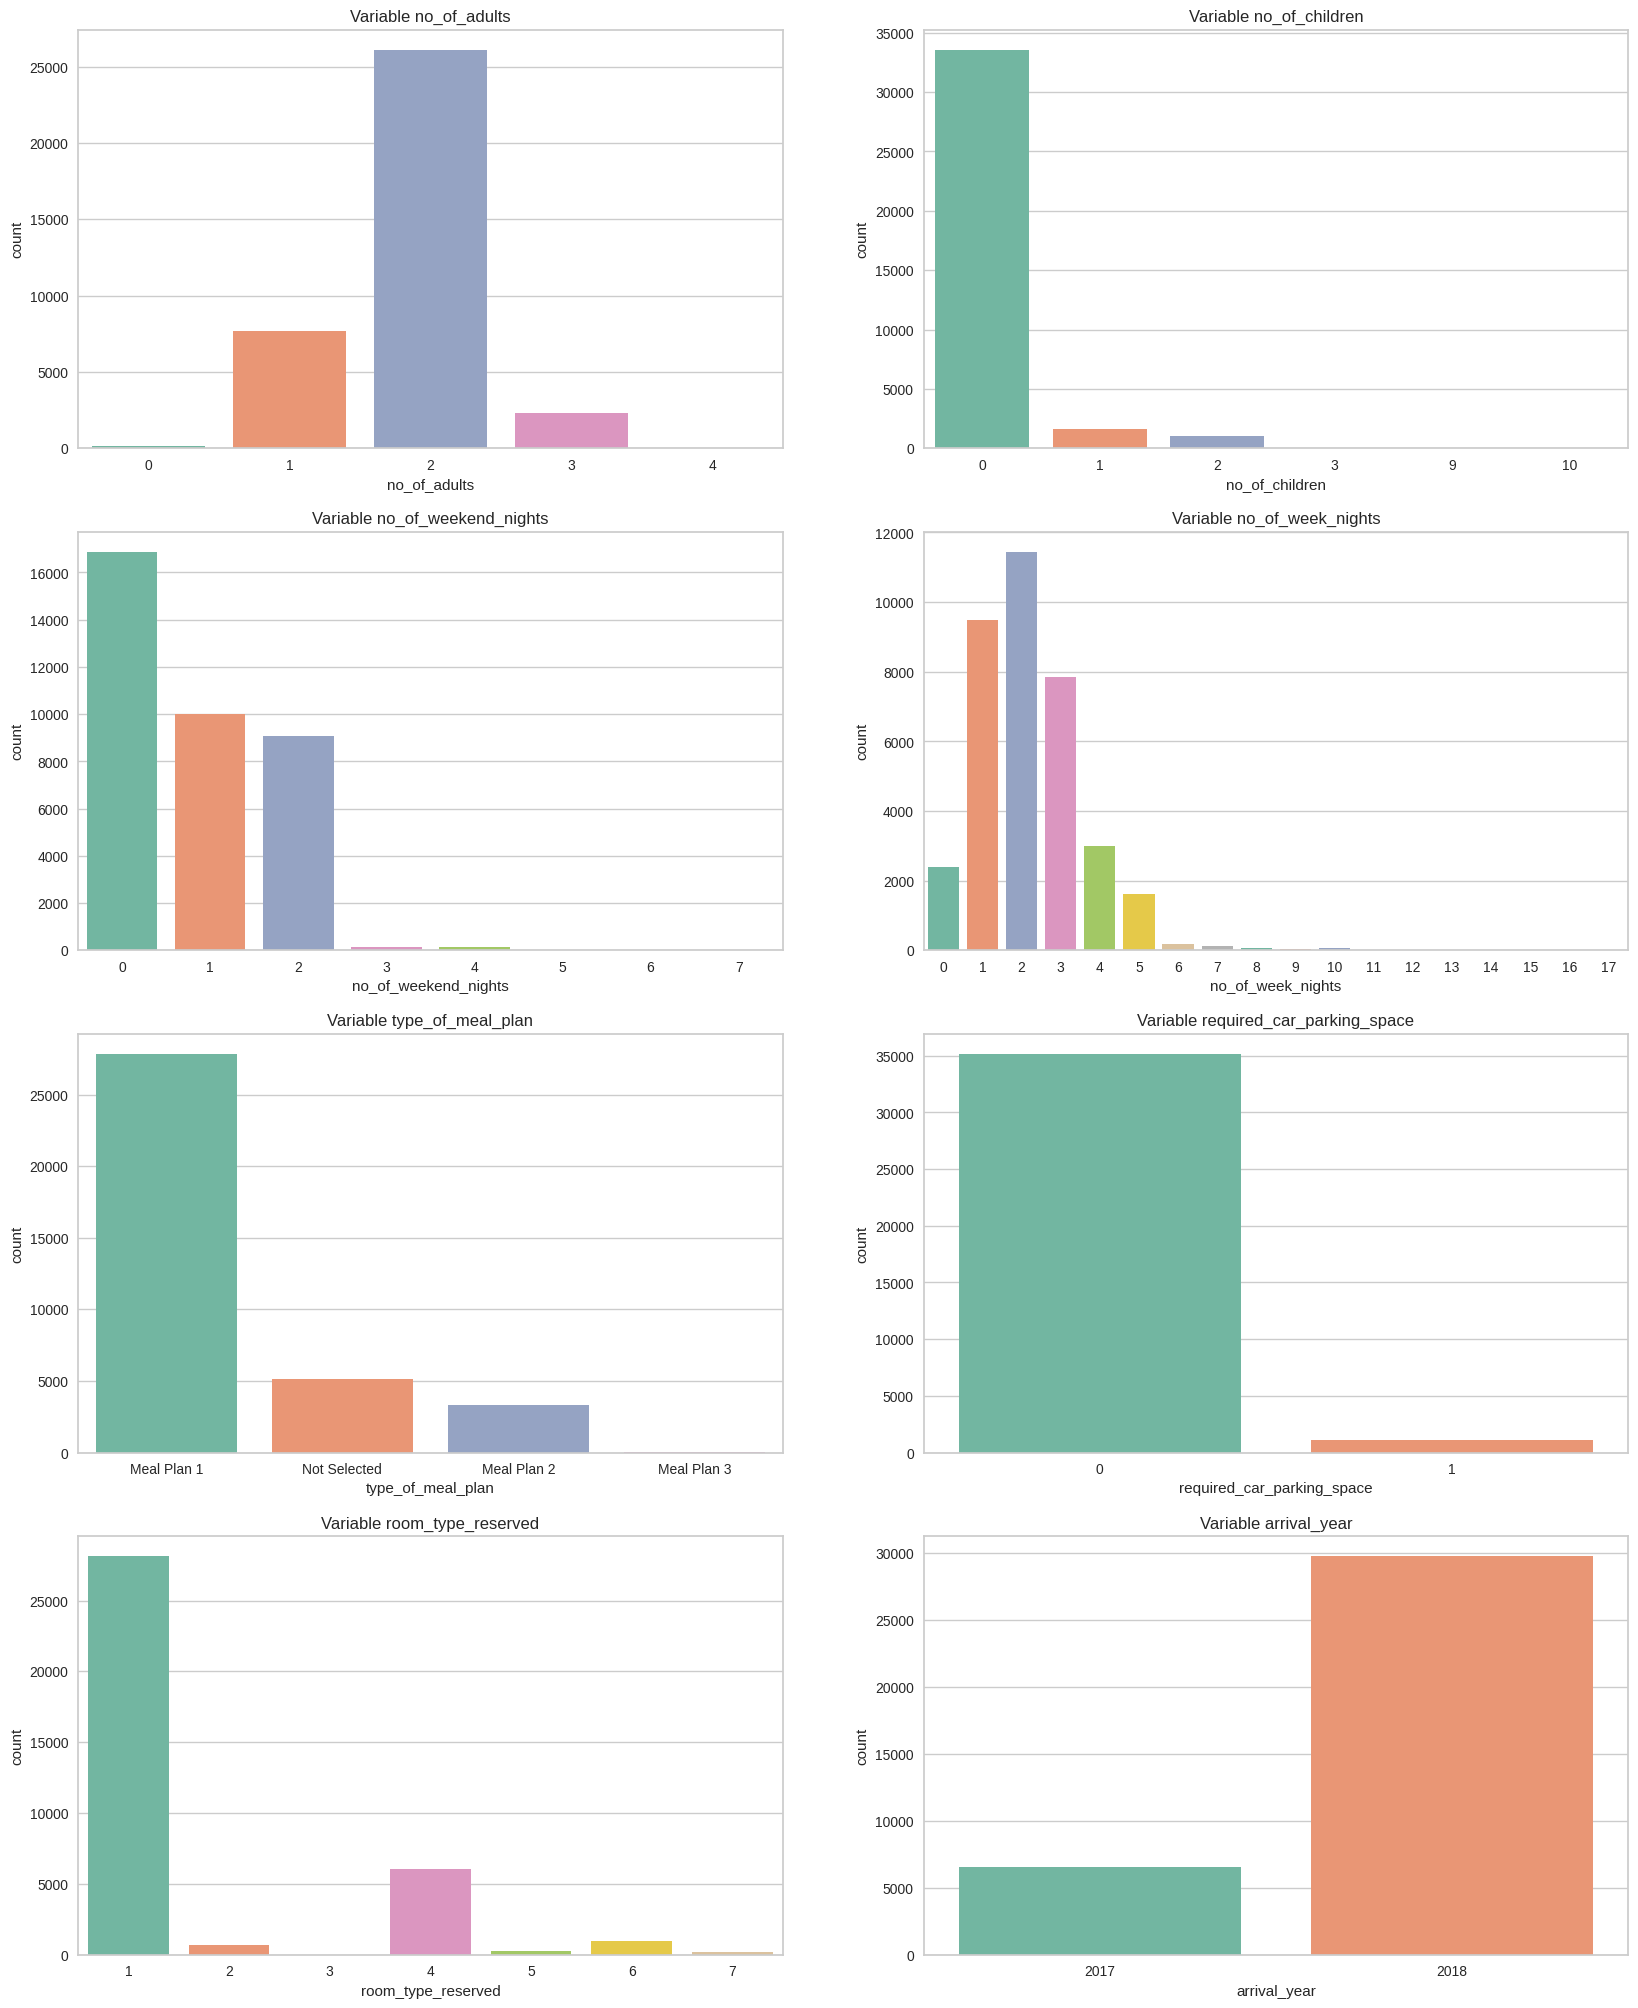

In [494]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

In [495]:
!pip install numerize
from numerize import numerize

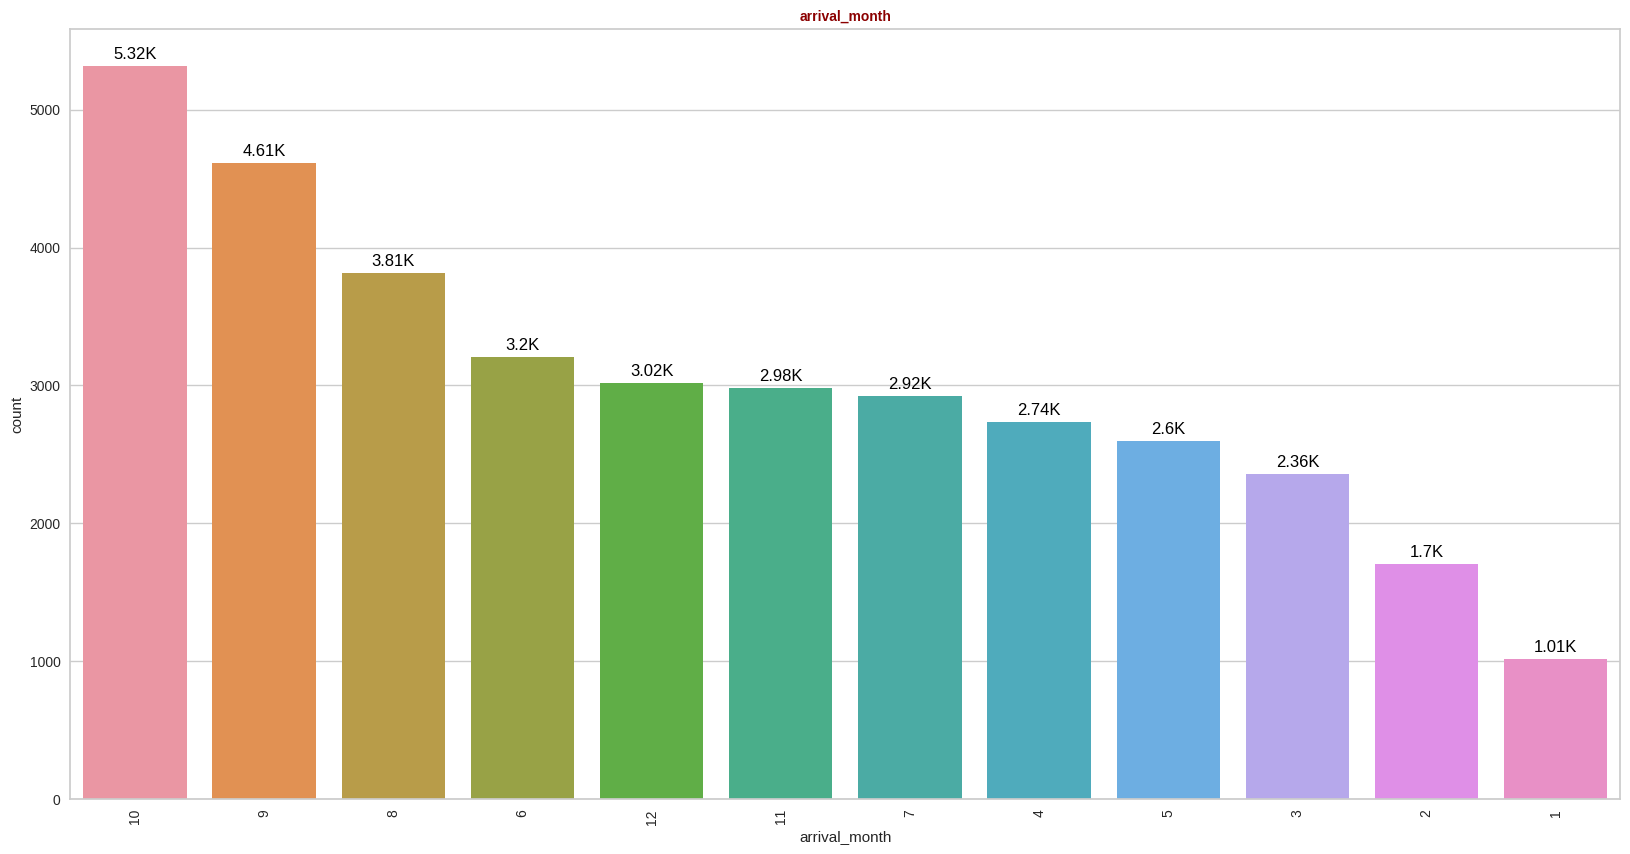

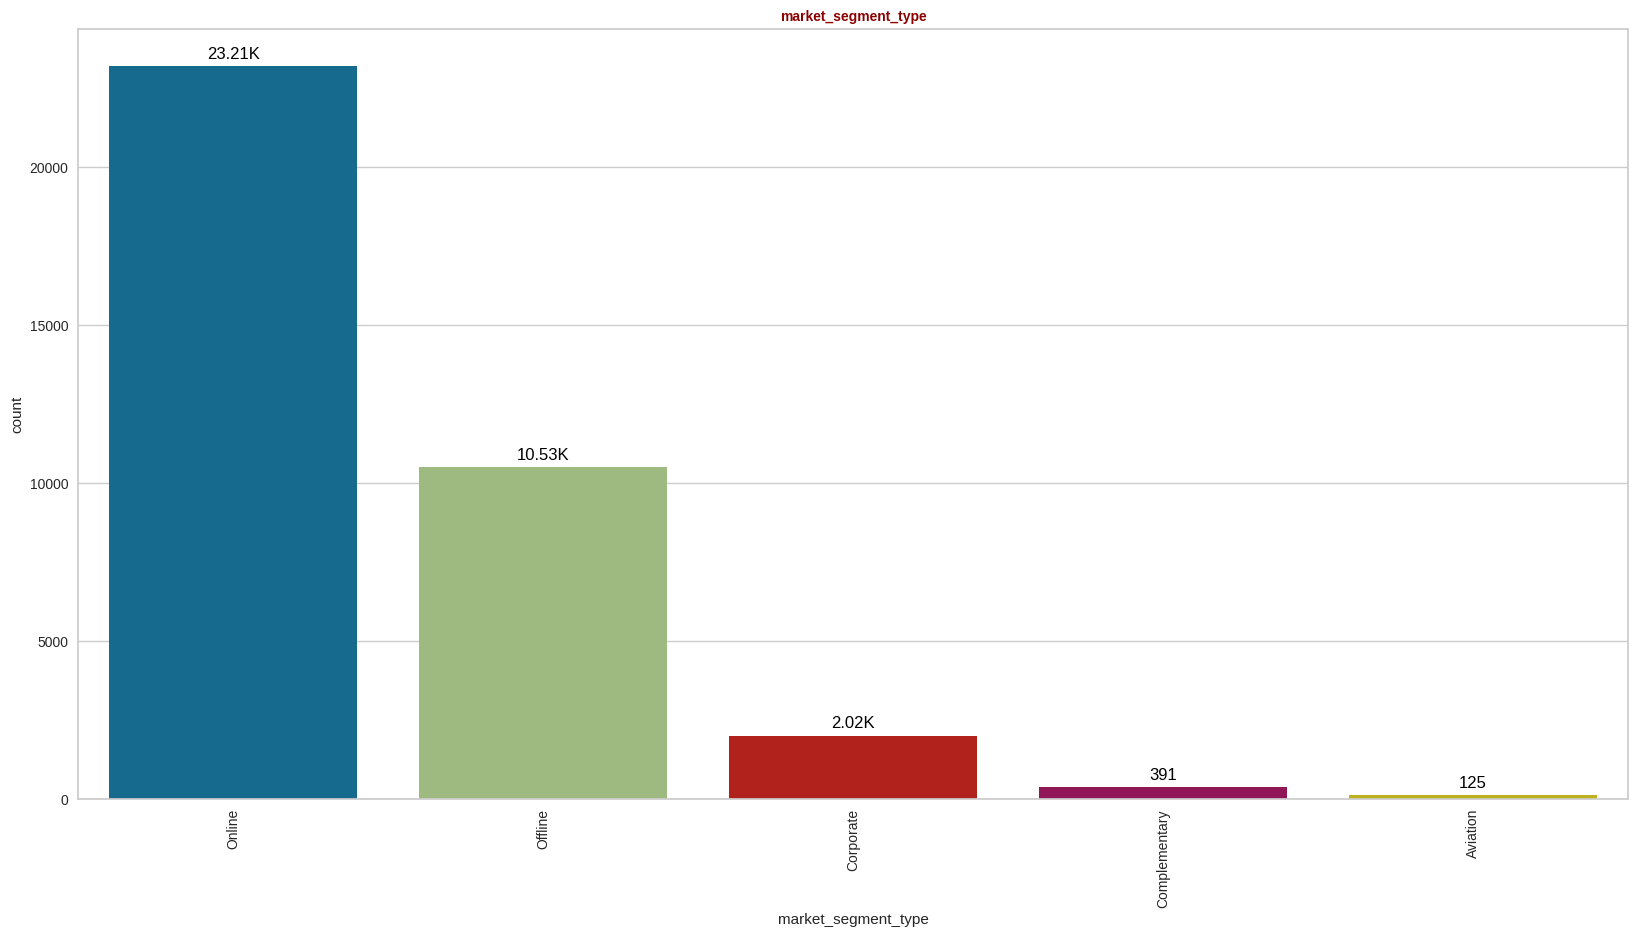

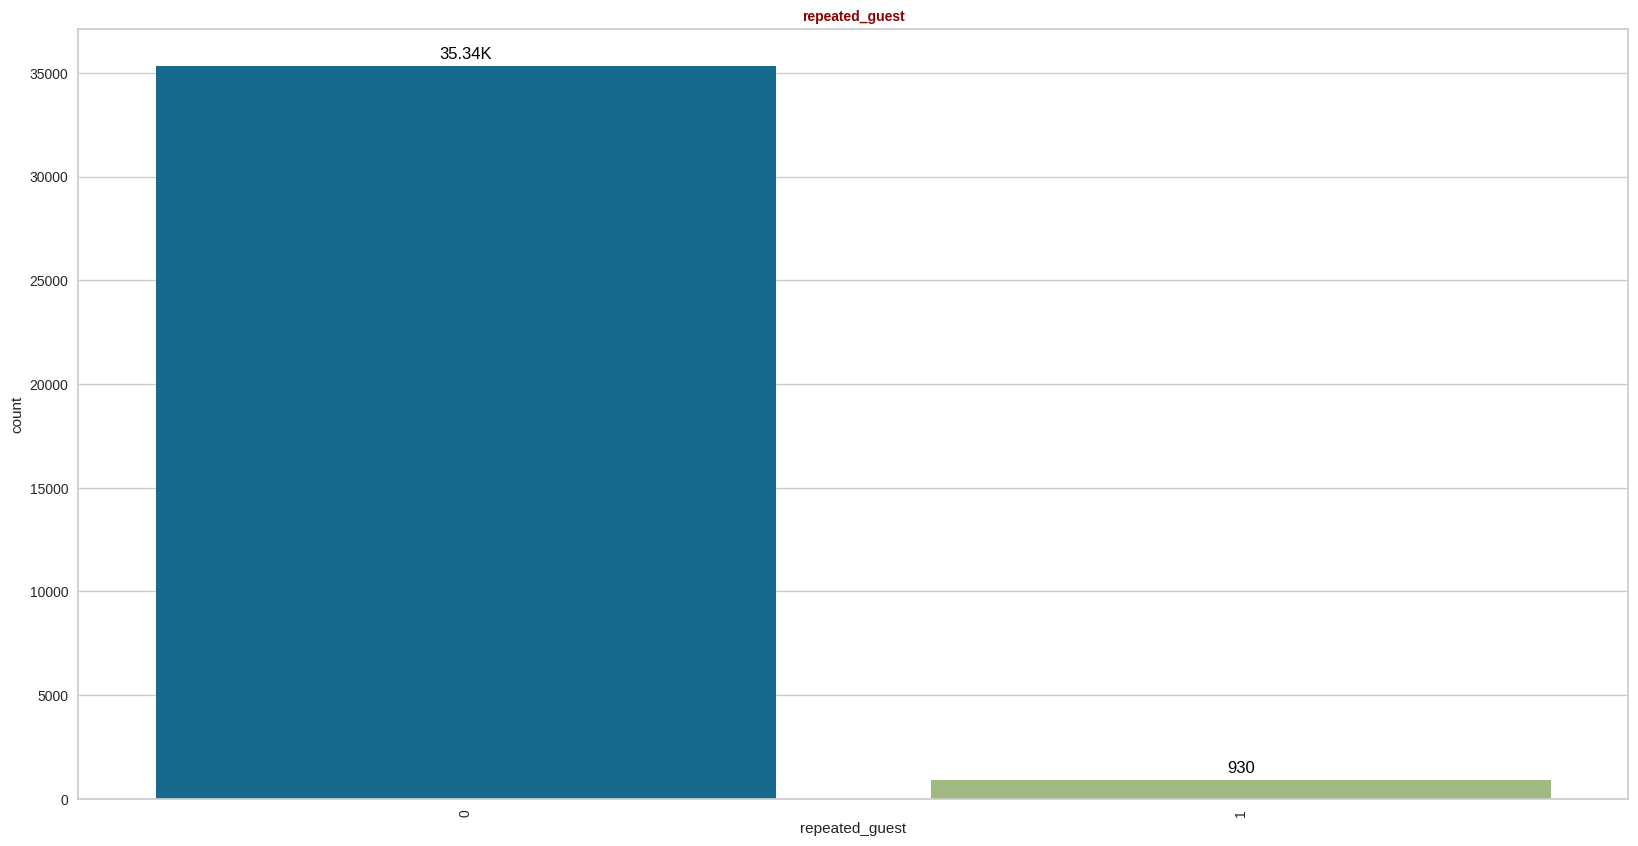

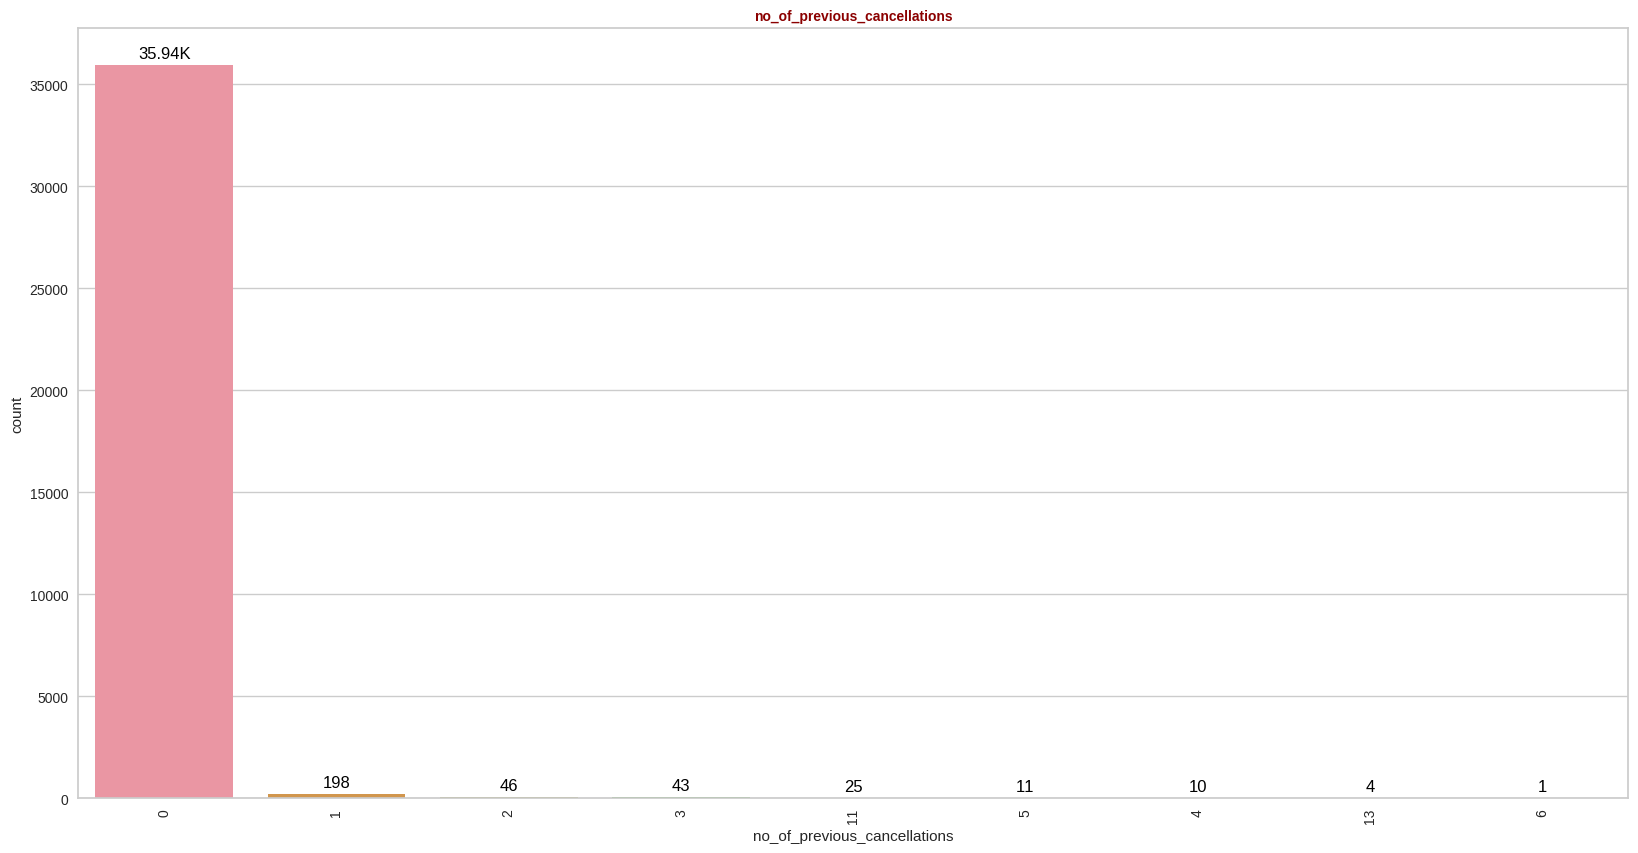

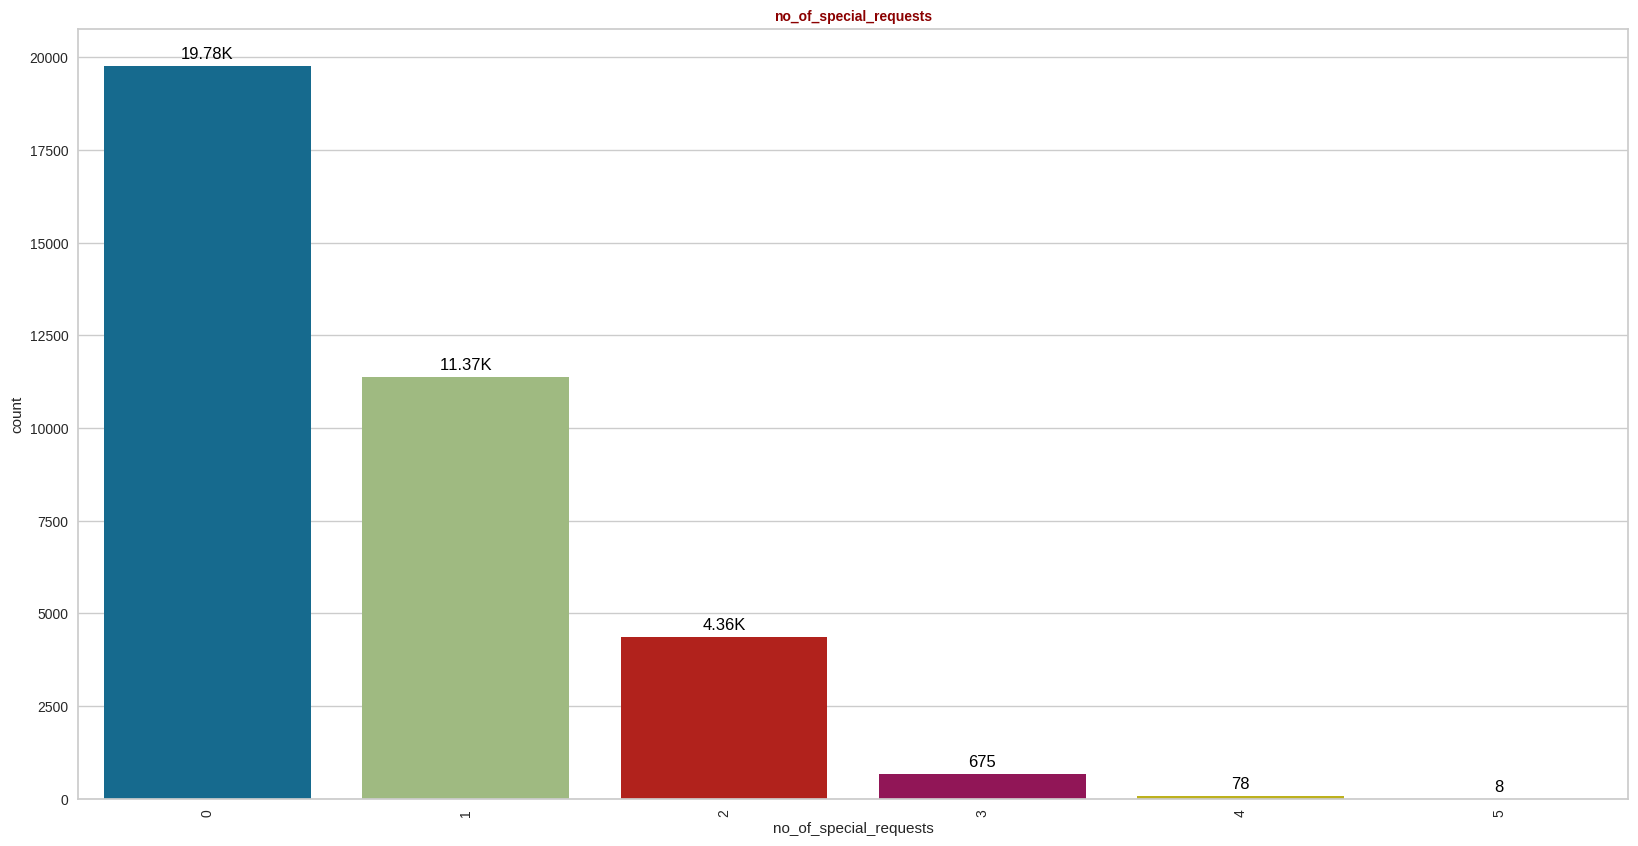

In [496]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "arrival_month", ax = ax,order=df['arrival_month'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2, height),
               xytext = (0,3),
               textcoords = "offset points",
               ha = "center",
               va = "bottom",
               color = "black")
ax.set_title("arrival_month", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()



fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "market_segment_type", ax = ax,order=df['market_segment_type'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2, height),
               xytext = (0,3),
               textcoords = "offset points",
               ha = "center",
               va = "bottom",
               color = "black")
ax.set_title("market_segment_type", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()


fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "repeated_guest", ax = ax,order=df['repeated_guest'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2, height),
               xytext = (0,3),
               textcoords = "offset points",
               ha = "center",
               va = "bottom",
               color = "black")
ax.set_title("repeated_guest", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()


fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "no_of_previous_cancellations", ax = ax,order=df['no_of_previous_cancellations'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2, height),
               xytext = (0,3),
               textcoords = "offset points",
               ha = "center",
               va = "bottom",
               color = "black")
ax.set_title("no_of_previous_cancellations", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()


fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "no_of_special_requests", ax = ax,order=df['no_of_special_requests'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2, height),
               xytext = (0,3),
               textcoords = "offset points",
               ha = "center",
               va = "bottom",
               color = "black")
ax.set_title("no_of_special_requests", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

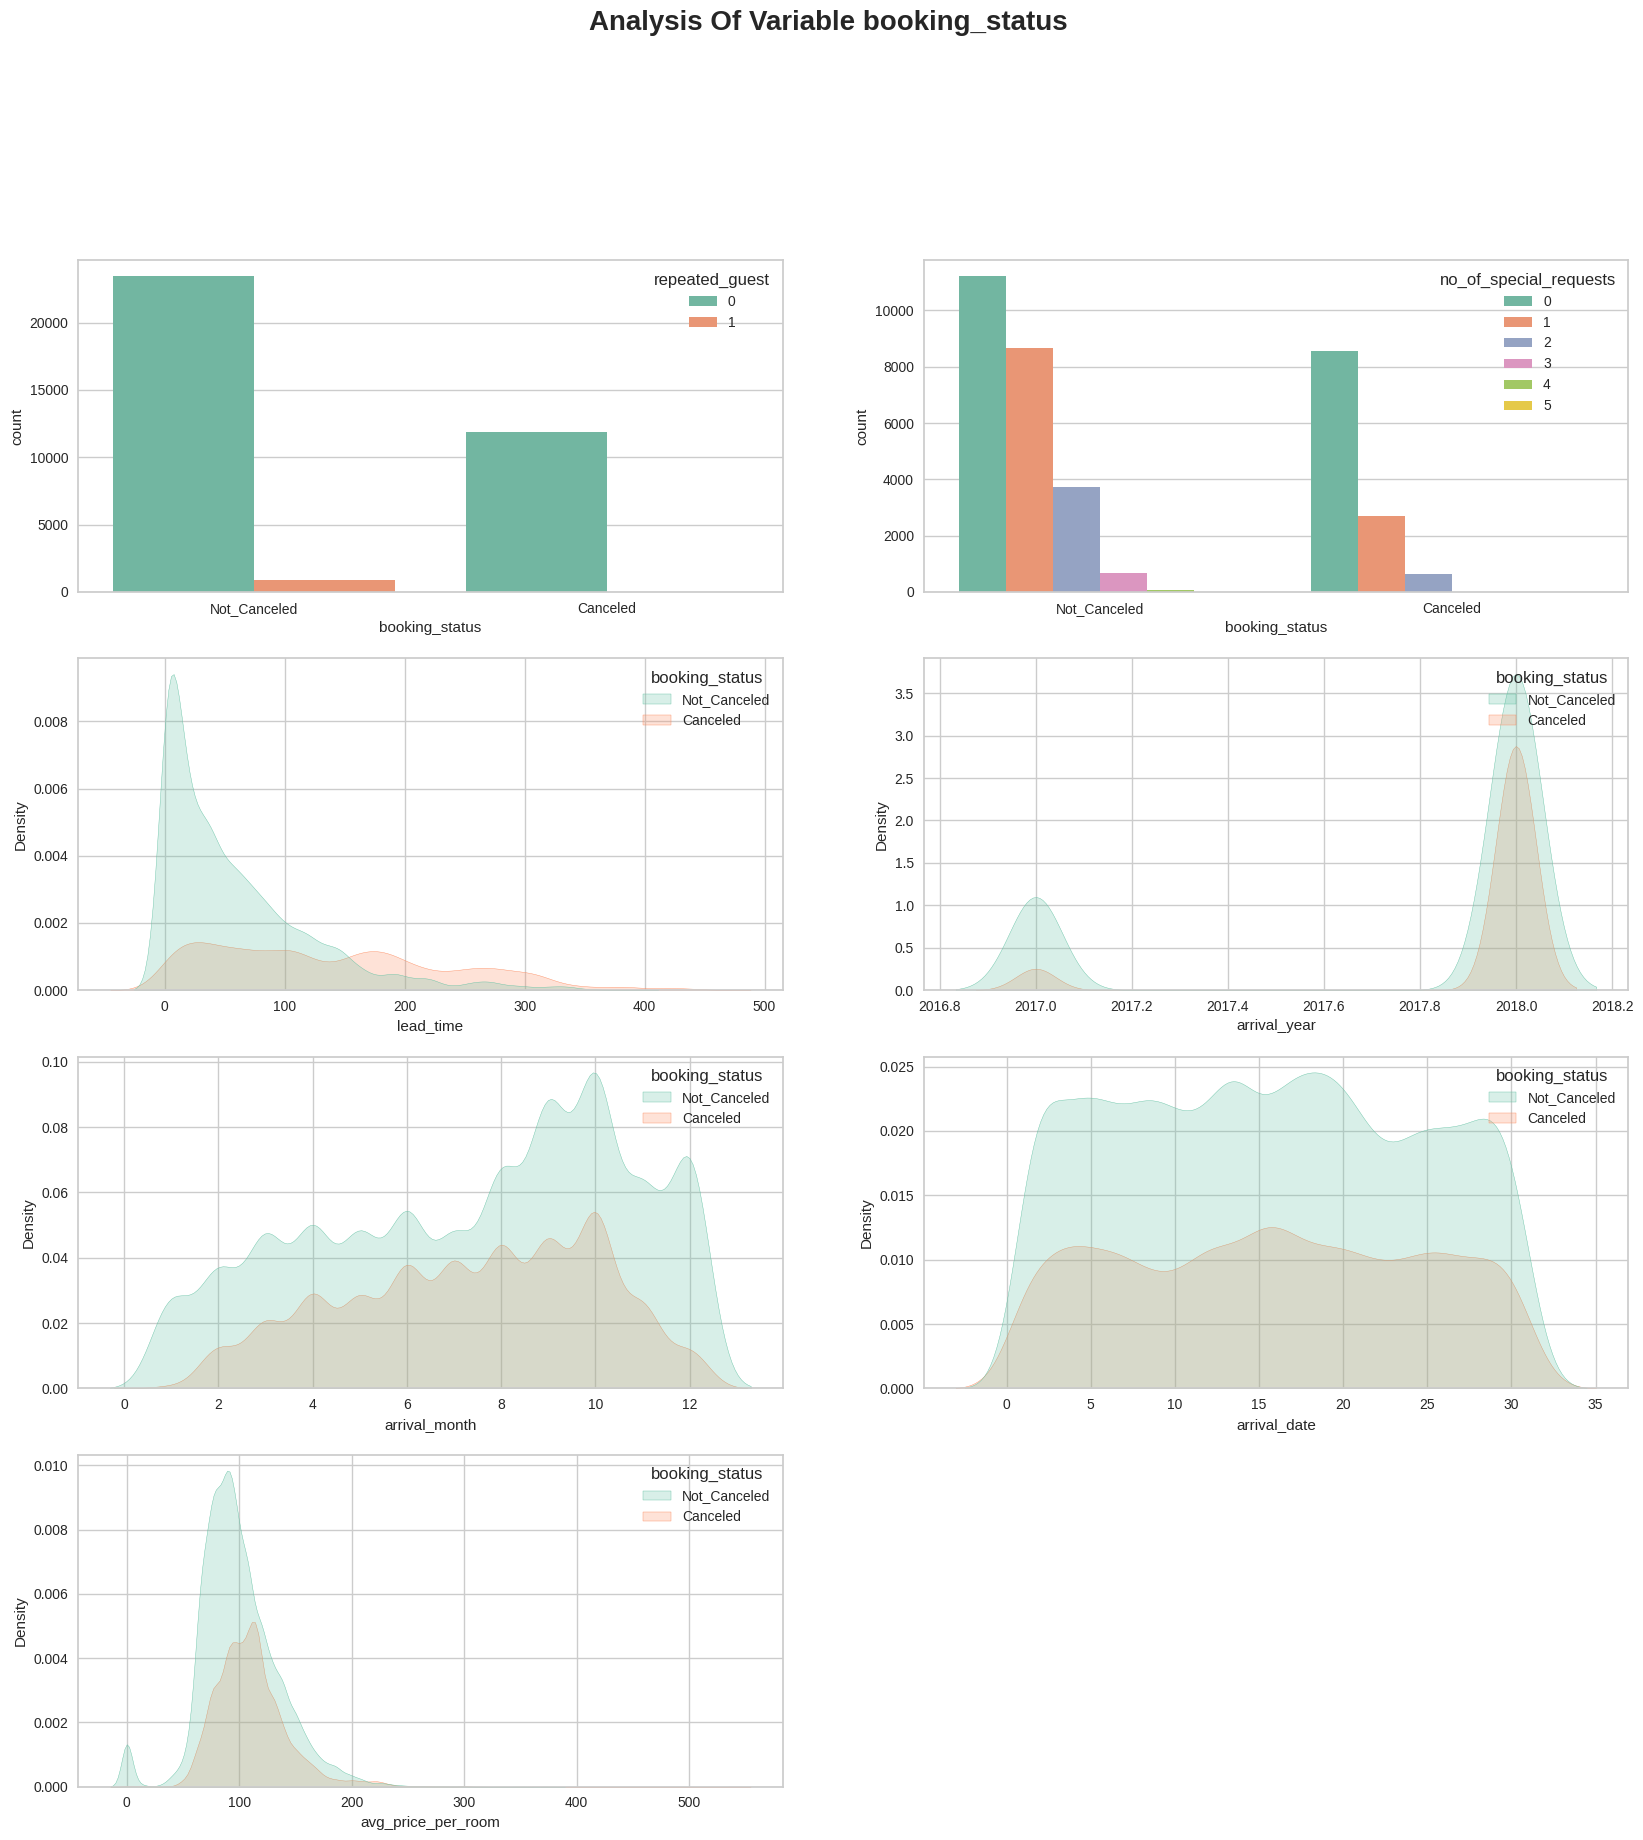

In [497]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)

<Axes: xlabel='lead_time', ylabel='Density'>

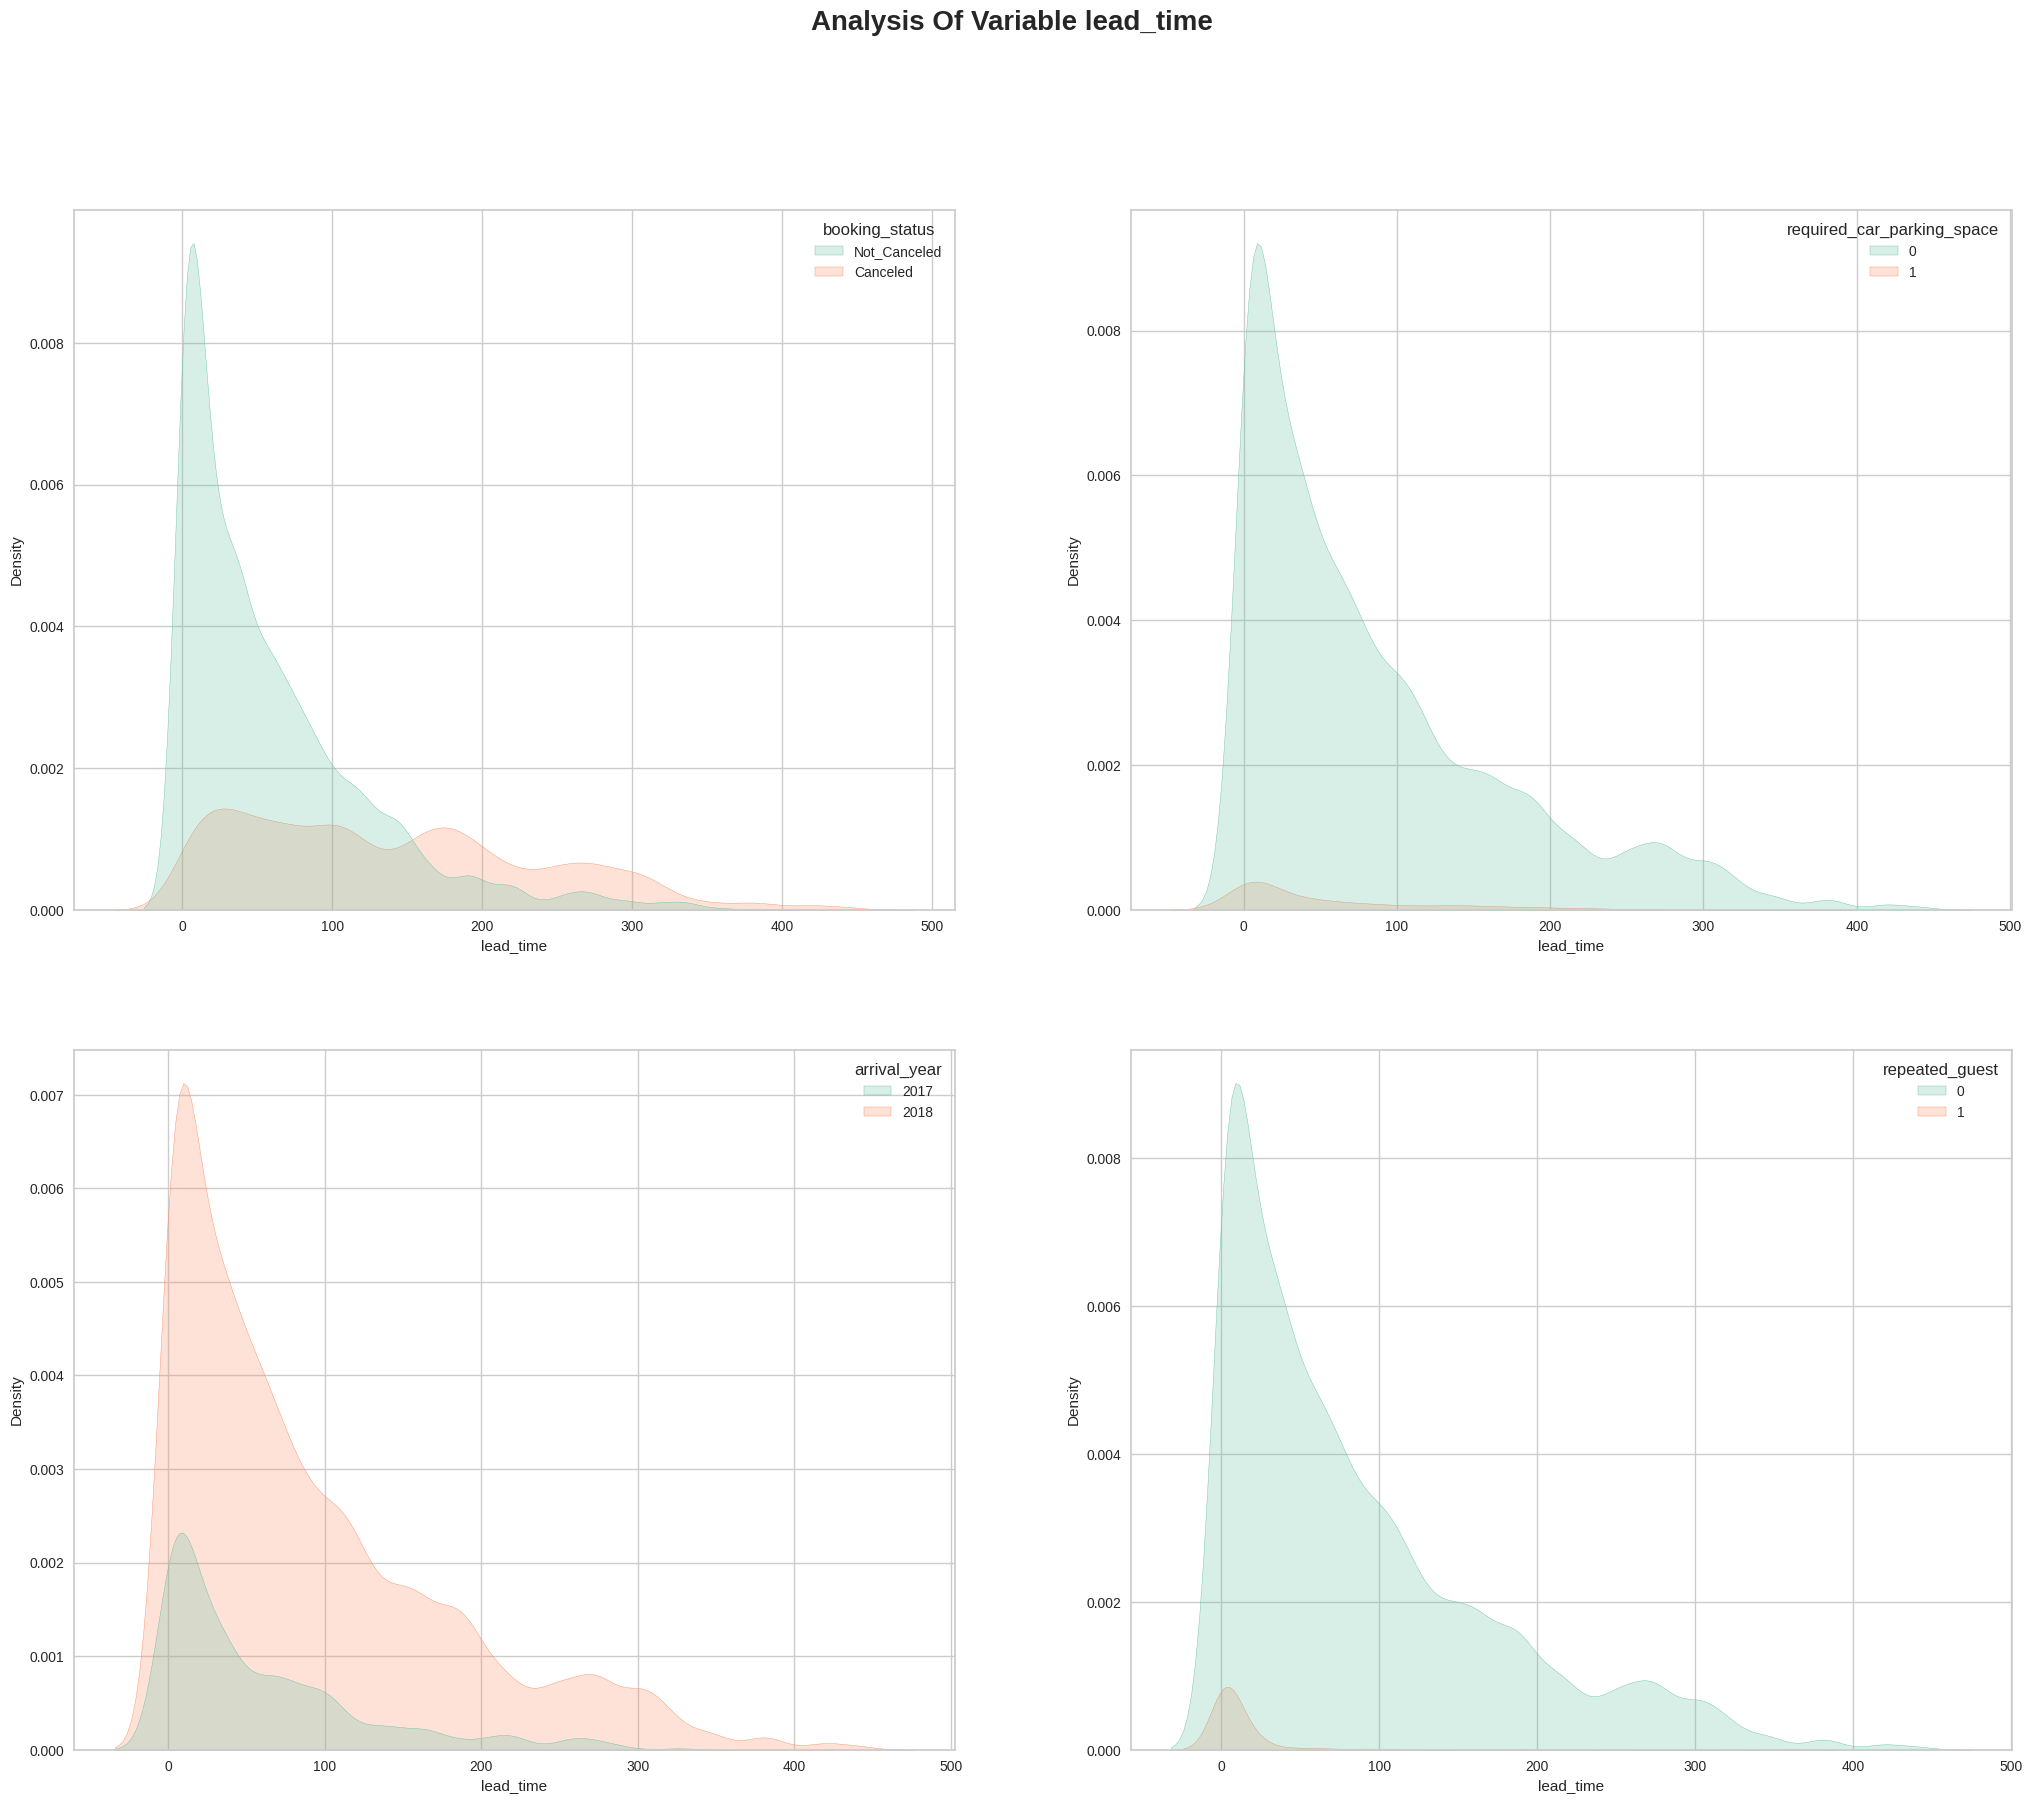

In [498]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', shade=True, data=df)

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='lead_time'>

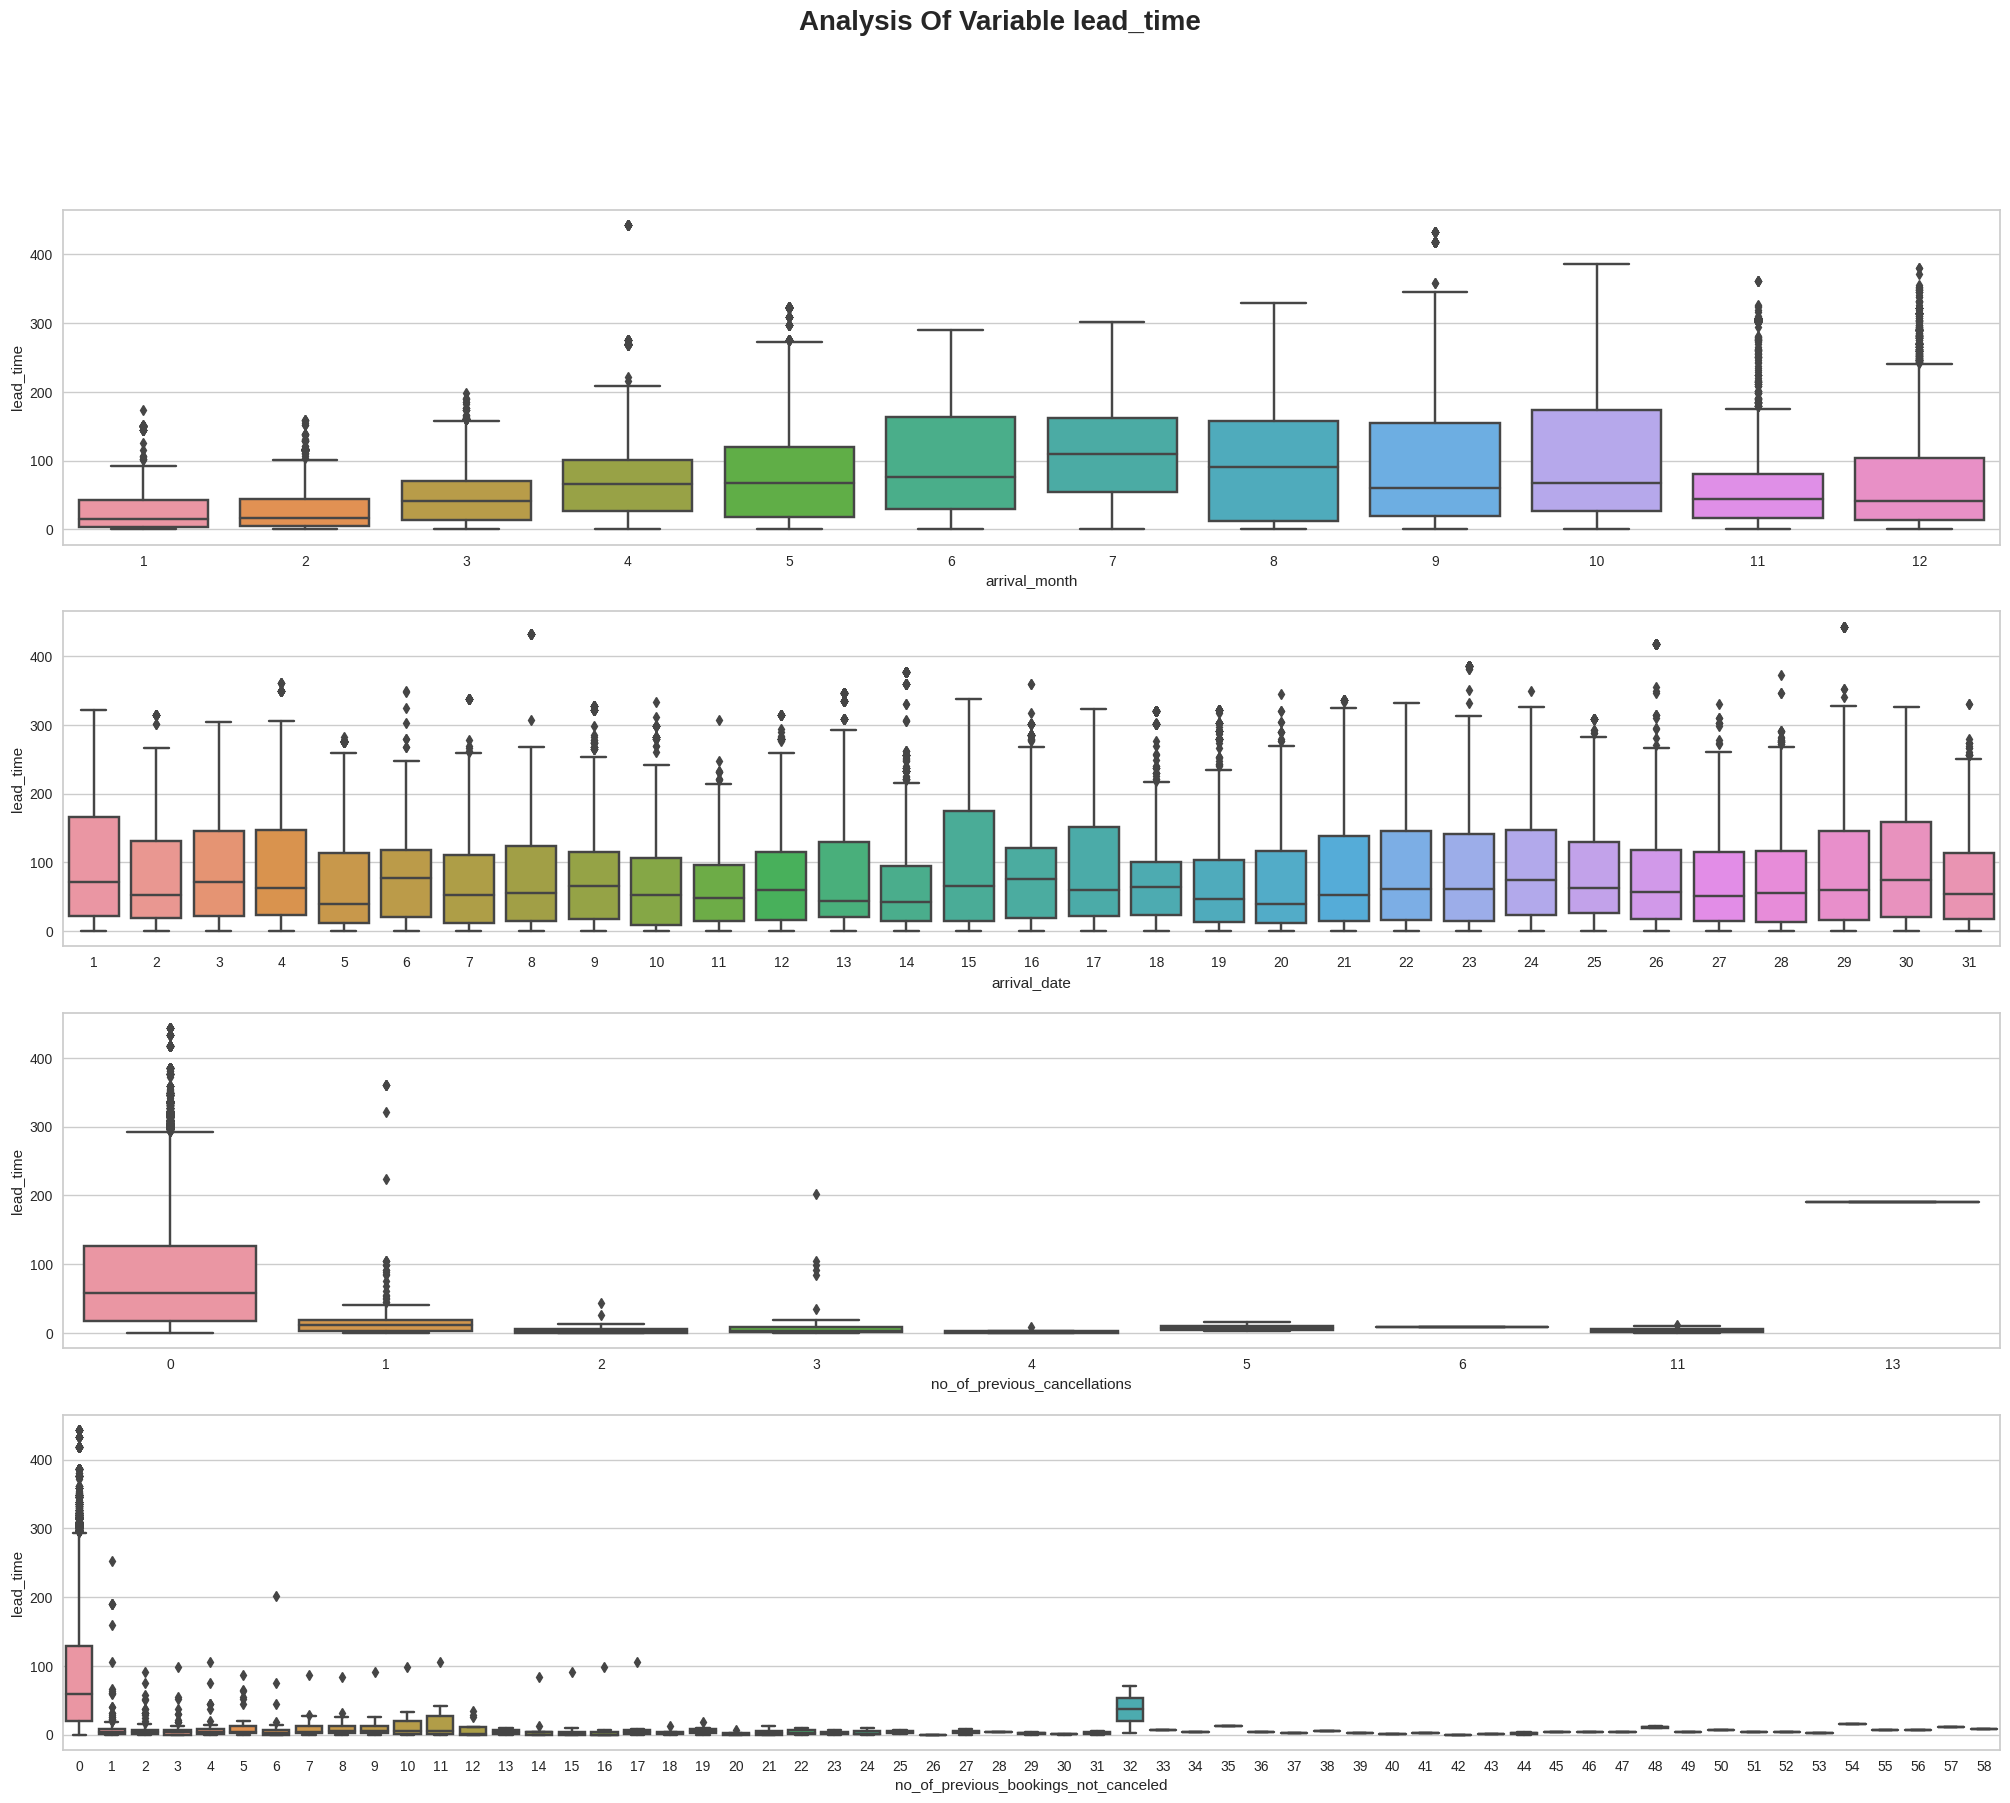

In [499]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month", y="lead_time", data=df)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date", y="lead_time", data=df)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations", y="lead_time", data=df)

plt.subplot(4,1,4)
sns.boxplot(x="no_of_previous_bookings_not_canceled", y="lead_time", data=df)

# Preprocessing


In [500]:
df = df.drop(['Booking_ID', 'arrival_year', 'arrival_date'], axis=1)

In [501]:
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,1,48,4,Online,0,0,0,94.50,0,Canceled


# Label Encoder


In [502]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

In [503]:
df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])

In [504]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


In [505]:
X = df[['no_of_adults','no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',	'required_car_parking_space', 'room_type_reserved',	'lead_time', 'arrival_month', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']]
y = df['booking_status']

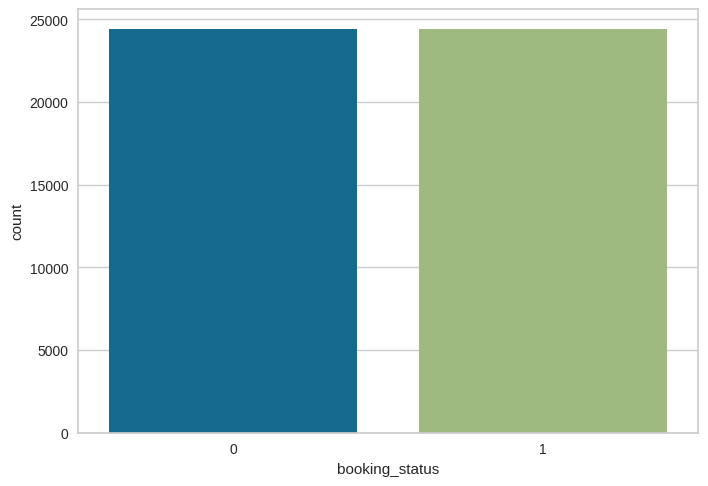

In [506]:
#Imbalance Class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [507]:
df.shape

(36275, 16)

In [508]:
X.shape

(48780, 15)

In [509]:
y

0        1
1        1
2        0
3        0
4        0
        ..
48775    0
48776    0
48777    0
48778    0
48779    0
Name: booking_status, Length: 48780, dtype: int64

# Split Data

In [510]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [511]:
# scaler = StandardScaler()
# X_standard = scaler.fit_transform(X)

In [512]:
# user_input = float(input("Masukkan nilai test_size (contoh: 0.2 untuk 80-20 split): "))

# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=user_input,
#     random_state=0
# )


In [513]:
def train_test_split_custom(X, y, test_size, random_state=0):
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test


# RF Classifier

In [514]:
def calculate_entropy(y_prob):
    epsilon = 1e-15
    log_prob = np.log2(np.maximum(y_prob, epsilon))
    entropy = -np.sum(y_prob * log_prob, axis=1)
    return entropy

In [515]:
def train_decision_tree(X, y, max_depth, random_state):
    if max_depth == 0 or len(set(y)) == 1 or len(y) == 0:
        return {'leaf': True, 'class': Counter(y).most_common(1)[0][0] if len(y) > 0 else None}

    feature_indices = np.random.choice(X.shape[1], size=int(np.sqrt(X.shape[1])), replace=False)
    best_feature, split_value = find_best_split(X[:, feature_indices], y)

    if best_feature is None:
        return {'leaf': True, 'class': Counter(y).most_common(1)[0][0]}

    left_indices = X[:, best_feature] <= split_value
    right_indices = ~left_indices

    left_tree = train_decision_tree(X[left_indices], y[left_indices], max_depth-1, random_state)
    right_tree = train_decision_tree(X[right_indices], y[right_indices], max_depth-1, random_state)

    return {'leaf': False, 'feature_index': feature_indices[best_feature], 'split_value': split_value,
            'left': left_tree, 'right': right_tree}

In [516]:
def find_best_split(X, y):
    best_feature = None
    best_split_value = None
    best_gini = 1.0

    for feature_index in range(X.shape[1]):
        feature_values = X[:, feature_index]
        unique_values = np.unique(feature_values)

        for value in unique_values:
            left_indices = feature_values <= value
            right_indices = ~left_indices

            gini = calculate_gini(y[left_indices], y[right_indices])

            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_split_value = value

    return best_feature, best_split_value

In [517]:
def calculate_gini(y1, y2):
    size = len(y1) + len(y2)
    gini = (len(y1) / size) * gini_index(y1) + (len(y2) / size) * gini_index(y2)
    return gini

In [518]:
def gini_index(y):
    if len(y) == 0:
        return 0.0
    p = np.array([np.sum(y == c) / len(y) for c in np.unique(y)])
    return 1.0 - np.sum(p ** 2)

In [519]:
# def predict_tree(tree, X):
#     if tree['leaf']:
#         return tree['class']

#     if X[tree['feature_index']] <= tree['split_value']:
#         return predict_tree(tree['left'], X)
#     else:
#         return predict_tree(tree['right'], X)
def predict_tree(tree, X):
    return tree.predict(X.reshape(1, -1))[0]


In [520]:
def predict_forest(forest, X):
    predictions = [predict_tree(tree, X) for tree in forest]
    return int(np.argmax(np.bincount(predictions)))

In [521]:
def train_random_forest(X_train, y_train, n_estimators, max_depth, random_state):
    forest = []
    for _ in range(n_estimators):
        indices = np.random.choice(X_train.shape[0], size=X_train.shape[0], replace=True)
        X_bootstrap = X_train.iloc[indices]
        y_bootstrap = y_train.iloc[indices]
        tree = train_decision_tree(X_bootstrap.values, y_bootstrap.values, max_depth, random_state)
        forest.append(tree)
    return forest

In [522]:
def evaluate_random_forest(forest, X_test, y_test):
    predictions = [predict_tree(tree, X_test) for tree in forest]
    predictions = np.array(predictions).T
    majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)
    accuracy = np.sum(majority_votes == y_test) / len(y_test)
    return accuracy

In [523]:
def predict_tree(tree, X):
    if tree['leaf']:
        return tree['class']

    if X[tree['feature_index']] <= tree['split_value']:
        return predict_tree(tree['left'], X)
    else:
        return predict_tree(tree['right'], X)

In [532]:
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Split the data into training and testing sets
user_input = float(input("Enter the test_size value (e.g., 0.2 for an 80-20 split): "))
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=user_input, random_state=0)

# Reset index to ensure integer labels
X_train = X_train.reset_index(drop=True)

# Check if y_train is not empty
if len(y_train) == 0:
    raise ValueError("Empty y_train: There should be at least one element in y_train for training the random forest.")

# Enter the number of trees (n_estimators)
n_estimators = int(input("Enter the number of trees (1-1000): "))
n_estimators = max(1, min(1000, n_estimators))

# Train the random forest
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=11, random_state=0)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Enter the test_size value (e.g., 0.2 for an 80-20 split): 0.2
Enter the number of trees (1-1000): 10
Random Forest Accuracy: 85.60%


In [536]:
no_of_adults = float(input("Masukkan jumlah orang dewasa: "))
no_of_children = float(input("Masukkan jumlah anak-anak: "))
no_of_weekend_nights = float(input("Masukkan jumlah malam akhir pekan: "))
no_of_week_nights = float(input("Masukkan jumlah malam kerja: "))
type_of_meal_plan = float(input("Masukkan tipe paket makanan (0 untuk tidak ada paket, 1 untuk paket tertentu): "))
required_car_parking_space = float(input("Masukkan apakah memerlukan tempat parkir mobil (0 untuk tidak, 1 untuk ya): "))
room_type_reserved = float(input("Masukkan tipe kamar yang dipesan: "))
lead_time = float(input("Masukkan lead time (jumlah hari antara pemesanan dan kedatangan): "))
arrival_month = float(input("Masukkan bulan kedatangan: "))
market_segment_type = float(input("Masukkan tipe segmen pasar: "))
repeated_guest = float(input("Masukkan apakah tamu berulang (0 untuk tidak, 1 untuk ya): "))
no_of_previous_cancellations = float(input("Masukkan jumlah pembatalan sebelumnya: "))
no_of_previous_bookings_not_canceled = float(input("Masukkan jumlah pemesanan sebelumnya yang tidak dibatalkan: "))
avg_price_per_room = float(input("Masukkan rata-rata harga per kamar: "))
no_of_special_requests = float(input("Masukkan jumlah permintaan khusus: "))


Masukkan jumlah orang dewasa: 1
Masukkan jumlah anak-anak: 1
Masukkan jumlah malam akhir pekan: 1
Masukkan jumlah malam kerja: 1
Masukkan tipe paket makanan (0 untuk tidak ada paket, 1 untuk paket tertentu): 1
Masukkan apakah memerlukan tempat parkir mobil (0 untuk tidak, 1 untuk ya): 1
Masukkan tipe kamar yang dipesan: 1
Masukkan lead time (jumlah hari antara pemesanan dan kedatangan): 1
Masukkan bulan kedatangan: 1
Masukkan tipe segmen pasar: 1
Masukkan apakah tamu berulang (0 untuk tidak, 1 untuk ya): 1
Masukkan jumlah pembatalan sebelumnya: 1
Masukkan jumlah pemesanan sebelumnya yang tidak dibatalkan: 1
Masukkan rata-rata harga per kamar: 1
Masukkan jumlah permintaan khusus: 1


In [537]:
new_data = pd.DataFrame({
    'no_of_adults': [no_of_adults],
    'no_of_children': [no_of_children],
    'no_of_weekend_nights': [no_of_weekend_nights],
    'no_of_week_nights': [no_of_week_nights],
    'type_of_meal_plan': [type_of_meal_plan],
    'required_car_parking_space': [required_car_parking_space],
    'room_type_reserved': [room_type_reserved],
    'lead_time': [lead_time],
    'arrival_month': [arrival_month],
    'market_segment_type': [market_segment_type],
    'repeated_guest': [repeated_guest],
    'no_of_previous_cancellations': [no_of_previous_cancellations],
    'no_of_previous_bookings_not_canceled': [no_of_previous_bookings_not_canceled],
    'avg_price_per_room': [avg_price_per_room],
    'no_of_special_requests': [no_of_special_requests]
})


In [538]:
new_data_normalized = (new_data - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

prediction = random_forest.predict(new_data_normalized)

predicted_class = label_encoder_booking_status.inverse_transform(prediction)

print(f"Predicted Booking Status: {predicted_class[0]}")

Predicted Booking Status: Not_Canceled


# Save Training Model

In [ ]:
import pickle

In [ ]:
with open('model.sav', 'wb') as model_file:
    pickle.dump(random_forest, model_file)